In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [17]:
df = pd.read_csv("data/cleaned_data/hyderabad/hyd_properties_feature_engineered.csv")
df.head(3)

,property_type,bhk,area,locality,city,price_in_crore,new_resale,age_of_property,bathrooms,carpet_area,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
0,Flat,2,1120.00,Asmangarh,Hyderabad,0.58,Resale,Old Property,2,993.55,4.00,1.00,Semi-Furnished,North,31,6,0,0,1
1,Flat,3,1905.00,Kokapet,Hyderabad,1.39,New,New Property,3,1689.92,9.00,1.00,Unfurnished,East,0,0,0,0,0
2,House,10,14400.00,Banjara Hills,Hyderabad,17.47,Resale,Moderately New Property,11,12774.19,2.00,1.00,Semi-Furnished,North,0,0,0,0,0


- Since the entire city column contains only one value, "Hyderabad," it provides no variation or additional information for the model. Therefore, dropping this column is a sensible choice to simplify the data without losing predictive power.

In [18]:
df = df.drop('city', axis='columns')

In [19]:
df.shape

(13452, 18)

#### Check Duplicate Rows

In [20]:
df.duplicated().sum()

np.int64(155)

In [21]:
df[df.duplicated(keep=False)].sort_values(['property_type','bhk','area','locality'])

,property_type,bhk,area,locality,price_in_crore,new_resale,age_of_property,bathrooms,carpet_area,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
3574,Flat,1,607.00,Miyapur,0.36,New,New Property,1,538.47,3.00,1.00,Unfurnished,East,47,0,0,0,0
4293,Flat,1,607.00,Miyapur,0.36,New,New Property,1,538.47,3.00,1.00,Unfurnished,East,47,0,0,0,0
8296,Flat,1,607.00,Miyapur,0.36,New,New Property,1,538.47,3.00,1.00,Unfurnished,East,47,0,0,0,0
8292,Flat,2,895.00,Ida Pashamylaram,0.38,New,Moderately New Property,2,793.95,2.00,1.00,Unfurnished,East,17,0,0,0,0
9686,Flat,2,895.00,Ida Pashamylaram,0.38,New,Moderately New Property,2,793.95,2.00,1.00,Unfurnished,East,17,0,0,0,0
440,Flat,2,960.00,Nacharam,0.72,New,New Property,2,851.61,1.00,3.00,Semi-Furnished,East,9,0,0,0,0
520,Flat,2,960.00,Nacharam,0.72,New,New Property,2,851.61,1.00,3.00,Semi-Furnished,East,9,0,0,0,0
543,Flat,2,960.00,Nacharam,0.72,New,New Property,2,851.61,1.00,3.00,Semi-Furnished,East,9,0,0,0,0
2874,Flat,2,960.00,Nacharam,0.72,New,New Property,2,851.61,1.00,3.00,Semi-Furnished,East,9,0,0,0,0
4182,Flat,2,960.00,Nacharam,0.72,New,New Property,2,851.61,1.00,3.00,Semi-Furnished,East,9,0,0,0,0


In [22]:
df1 = df.drop_duplicates()
df1.duplicated().sum()

np.int64(0)

In [23]:
df1.isnull().sum()

property_type       0
bhk                 0
area                0
locality            0
price_in_crore      0
new_resale          0
age_of_property     0
bathrooms           0
carpet_area         0
floor               0
balconies           0
furnishing_type     0
facing              0
amenities_score     0
furnishing_score    0
study_room          0
servant_room        0
pooja_room          0
dtype: int64

#### Categorize the floor column

In [24]:
df1['floor'].unique()

array([ 4.,  9.,  2.,  1.,  7., 16.,  5.,  8.,  3.,  0., 10., 20., 17.,
       14.,  6., 11., 34., 15., 12., 18., 19., 22., 27., 13., 38., 24.,
       39., 23., 21., 46., 43., 42., 28., 30., 48., 33., 26., 32., 40.,
       41., 36., 29., 31.])

In [25]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 48:
        return "High Floor"
    else:
        return None

In [26]:
df1['floor'] = df1['floor'].apply(categorize_floor)
df1['floor'].unique()

array(['Mid Floor', 'Low Floor', 'High Floor'], dtype=object)

#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [27]:
df1.locality = df1.locality.apply(lambda x: x.strip())
location_stats = df1['locality'].value_counts(ascending=False)
location_stats

locality
Kondapur                                 619
Kollur                                   501
Kokapet                                  470
Miyapur                                  449
Tellapur                                 446
Bachupally                               425
Manikonda                                370
Ameenpur                                 344
Kukatpally                               340
Kompally                                 298
Patancheru                               293
Puppalaguda                              291
Narsingi                                 290
Nanakramguda                             250
Gachibowli                               241
Chandanagar                              210
Aminpur                                  169
Bandlaguda Jagir                         156
Rajendra Nagar                           148
Hitech City                              140
Kapra                                    134
Nallagandla Gachibowli                   125
P

In [28]:
location_stats.values.sum()

np.int64(13297)

In [29]:
len(location_stats)

717

In [30]:
location_stats[location_stats<=10]

locality
Neredmet                                 10
Bhel                                     10
Basheer Bagh                             10
Kushaiguda                               10
Gowdavalli                               10
Bapu Nagar                               10
Cherlapalli                              10
Gurram Guda                              10
Trimalgherry                              9
Ramanthapur                               9
Sun City                                  9
Ecil                                      9
Hyderguda                                 9
Badangpet                                 9
Financial District                        9
Raviryal                                  8
Narepally                                 8
Sultanpur                                 8
Shadnagar                                 8
Janachaitanya Colony                      8
Madinaguda                                8
Yousufguda                                7
Bairagiguda            

<h4 style="color:blue">Dimensionality Reduction</h4>
<h5>Any location having less than 5 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns</h5>

In [31]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats_less_than_10)

559

In [32]:
df1['locality'] = df1['locality'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.locality.unique())

159

In [33]:
df1.head(3)

,property_type,bhk,area,locality,price_in_crore,new_resale,age_of_property,bathrooms,carpet_area,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
0,Flat,2,1120.00,other,0.58,Resale,Old Property,2,993.55,Mid Floor,1.00,Semi-Furnished,North,31,6,0,0,1
1,Flat,3,1905.00,Kokapet,1.39,New,New Property,3,1689.92,Mid Floor,1.00,Unfurnished,East,0,0,0,0,0
2,House,10,14400.00,Banjara Hills,17.47,Resale,Moderately New Property,11,12774.19,Low Floor,1.00,Semi-Furnished,North,0,0,0,0,0


<h2 align="center" style="color:blue">Feature Selection</h2>

#### Encode Categorical Columns

In [34]:
df2 = df1.copy()

In [35]:
df2['age_of_property'].unique()

array(['Old Property', 'New Property', 'Moderately New Property',
       'Very Old Property'], dtype=object)

In [36]:
df2['age_of_property'] = df2['age_of_property'].map({
    'New Property': 0,
    'Moderately New Property': 1,
    'Old Property': 2,
    'Very Old Property': 3
})
df2['age_of_property'].unique()

array([2, 0, 1, 3])

In [37]:
df2['floor'].unique()

array(['Mid Floor', 'Low Floor', 'High Floor'], dtype=object)

In [38]:
df2['floor'] = df2['floor'].map({
    'Low Floor': 0,
    'Mid Floor': 1,
    'High Floor': 2
})
df2['floor'].unique()

array([1, 0, 2])

In [39]:
df2['furnishing_type'].unique()

array(['Semi-Furnished', 'Unfurnished', 'Furnished'], dtype=object)

In [40]:
df2['furnishing_type'] = df2['furnishing_type'].map({
    'Unfurnished': 0,
    'Semi-Furnished': 1,
    'Furnished': 2
})
df2['furnishing_type'].unique()

array([1, 0, 2])

In [42]:
nominal_cols = ['property_type','locality','new_resale', 'facing']
df3 = pd.get_dummies(df2, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,bhk,area,price_in_crore,age_of_property,bathrooms,carpet_area,floor,balconies,furnishing_type,amenities_score,furnishing_score,study_room,servant_room,pooja_room,property_type_House,locality_Adikmet,locality_Alkapur Township,locality_Almasguda,locality_Alwal,locality_Amberpet,locality_Ameenpur,locality_Ameerpet,locality_Aminpur,locality_Appa Junction,locality_Appa Junction Peerancheru,locality_As Rao Nagar,locality_Attapur,locality_Auto Nagar,locality_B N Reddy Nagar,locality_Bachupally,locality_Bahadurpally,locality_Balanagar,locality_Balapur,locality_Bandlaguda Jagir,locality_Banjara Hills,locality_Beeramguda,locality_Begumpet,locality_Bhanur,locality_Boduppal,locality_Bolarum,locality_Bongloor,locality_Bowenpally,locality_Bowrampet,locality_Chandanagar,locality_Chengicherla,locality_Chinthal,locality_Dammaiguda,locality_Dilsukh Nagar,locality_Dundigal,locality_East Marredpally,locality_Film Nagar,locality_Gachibowli,locality_Gagillapur,locality_Gajularamaram,locality_Gajulramaram Kukatpally,locality_Gandi Maisamma,locality_Gandipet,locality_Ghatkesar,locality_Gopanpally,locality_Gundlapochampalli,locality_Gundlapochampally,locality_Habsiguda,locality_Hafeezpet,locality_Hastinapuram,locality_Hayathnagar,locality_Himayat Nagar,locality_Hitech City,locality_Hyder Nagar,locality_Ibrahimpatnam,locality_Indresham,locality_Isnapur,locality_Izzathnagar,locality_Jeedimetla,locality_Jubilee Hills,locality_Kachiguda,locality_Kadthal,locality_Kapra,locality_Kardhanur,locality_Karkhana,locality_Katedan Industrial Area,locality_Kavadiguda,locality_Khajaguda Nanakramguda Road,locality_Khajiguda,locality_Kismatpur,locality_Kistareddypet,locality_Kokapet,locality_Kollur,locality_Kompally,locality_Kondapur,locality_Kothapet,locality_Kowkur,locality_Krishna Reddy Pet,locality_Kukatpally,locality_Lb Nagar,locality_Madhapur,locality_Maheshwaram,locality_Malkajgiri,locality_Mallampet,locality_Mallapur,locality_Manchirevula,locality_Manikonda,locality_Mansoorabad,locality_Medchal,locality_Meerpet,locality_Mehdipatnam,locality_Miyapur,locality_Miyapur Hmt Swarnapuri Colony,locality_Mokila,locality_Moosapet,locality_Moti Nagar,locality_Moula Ali,locality_Muthangi,locality_Nacharam,locality_Nagaram,locality_Nagole,locality_Nallagandla Gachibowli,locality_Nallakunta,locality_Nanakramguda,locality_Nandigam,locality_Nandigama,locality_Narayanguda,locality_Narsingi,locality_Neknampur,locality_Nizampet,locality_Old Bowenpally,locality_Osman Nagar,locality_Padmarao Nagar,locality_Panchavati Colony,locality_Patancheru,locality_Pati,locality_Patighanpur,locality_Pedda Amberpet,locality_Peerzadiguda,locality_Pocharam,locality_Pragathi Nagar,locality_Pragathi Nagar Kukatpally,locality_Premavathi Pet,locality_Puppalaguda,locality_Quthbullapur,locality_Rajendra Nagar,locality_Ramachandra Puram,locality_Ramachandrapuram,locality_Rampally,locality_Sadashivpet,locality_Safilguda,locality_Saidabad,locality_Sainikpuri,locality_Sanath Nagar,locality_Sangareddy,locality_Saroor Nagar,locality_Saroornagar,locality_Serilingampally,locality_Shaikpet,locality_Shamirpet,locality_Shamshabad,locality_Shankarpalli,locality_Somajiguda,locality_Sri Nagar Colony,locality_Suchitra,locality_Suraram,locality_Tarnaka,locality_Tellapur,locality_Toli Chowki,locality_Tukkuguda,locality_Turkayamjal,locality_Uppal,locality_Uppal Kalan,locality_Vanasthalipuram,locality_Velimela,locality_Velmala,locality_West Marredpally,locality_Yapral,locality_other,new_resale_Resale,facing_North,facing_NorthEast,facing_NorthWest,facing_South,facing_SouthEast,facing_SouthWest,facing_West
0,2,1120.00,0.58,2,2,993.55,1,1.00,1,31,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0
1,3,1905.00,1.39,0,3,1689.92,1,1.00,0,0,0,

### Calculate VIF for Multicollinearity

In [43]:
from sklearn.preprocessing import StandardScaler

X = df3.drop(['price_in_crore'], axis='columns')
y = df3['price_in_crore']

cols_to_scale = ['bhk','area','age_of_property','bathrooms','carpet_area','floor','balconies','furnishing_type','amenities_score','furnishing_score','study_room','servant_room','pooja_room']
scaler = StandardScaler()

X[cols_to_scale] =  scaler.fit_transform(X[cols_to_scale])
X.describe()

,bhk,area,age_of_property,bathrooms,carpet_area,floor,balconies,furnishing_type,amenities_score,furnishing_score,study_room,servant_room,pooja_room,property_type_House,locality_Adikmet,locality_Alkapur Township,locality_Almasguda,locality_Alwal,locality_Amberpet,locality_Ameenpur,locality_Ameerpet,locality_Aminpur,locality_Appa Junction,locality_Appa Junction Peerancheru,locality_As Rao Nagar,locality_Attapur,locality_Auto Nagar,locality_B N Reddy Nagar,locality_Bachupally,locality_Bahadurpally,locality_Balanagar,locality_Balapur,locality_Bandlaguda Jagir,locality_Banjara Hills,locality_Beeramguda,locality_Begumpet,locality_Bhanur,locality_Boduppal,locality_Bolarum,locality_Bongloor,locality_Bowenpally,locality_Bowrampet,locality_Chandanagar,locality_Chengicherla,locality_Chinthal,locality_Dammaiguda,locality_Dilsukh Nagar,locality_Dundigal,locality_East Marredpally,locality_Film Nagar,locality_Gachibowli,locality_Gagillapur,locality_Gajularamaram,locality_Gajulramaram Kukatpally,locality_Gandi Maisamma,locality_Gandipet,locality_Ghatkesar,locality_Gopanpally,locality_Gundlapochampalli,locality_Gundlapochampally,locality_Habsiguda,locality_Hafeezpet,locality_Hastinapuram,locality_Hayathnagar,locality_Himayat Nagar,locality_Hitech City,locality_Hyder Nagar,locality_Ibrahimpatnam,locality_Indresham,locality_Isnapur,locality_Izzathnagar,locality_Jeedimetla,locality_Jubilee Hills,locality_Kachiguda,locality_Kadthal,locality_Kapra,locality_Kardhanur,locality_Karkhana,locality_Katedan Industrial Area,locality_Kavadiguda,locality_Khajaguda Nanakramguda Road,locality_Khajiguda,locality_Kismatpur,locality_Kistareddypet,locality_Kokapet,locality_Kollur,locality_Kompally,locality_Kondapur,locality_Kothapet,locality_Kowkur,locality_Krishna Reddy Pet,locality_Kukatpally,locality_Lb Nagar,locality_Madhapur,locality_Maheshwaram,locality_Malkajgiri,locality_Mallampet,locality_Mallapur,locality_Manchirevula,locality_Manikonda,locality_Mansoorabad,locality_Medchal,locality_Meerpet,locality_Mehdipatnam,locality_Miyapur,locality_Miyapur Hmt Swarnapuri Colony,locality_Mokila,locality_Moosapet,locality_Moti Nagar,locality_Moula Ali,locality_Muthangi,locality_Nacharam,locality_Nagaram,locality_Nagole,locality_Nallagandla Gachibowli,locality_Nallakunta,locality_Nanakramguda,locality_Nandigam,locality_Nandigama,locality_Narayanguda,locality_Narsingi,locality_Neknampur,locality_Nizampet,locality_Old Bowenpally,locality_Osman Nagar,locality_Padmarao Nagar,locality_Panchavati Colony,locality_Patancheru,locality_Pati,locality_Patighanpur,locality_Pedda Amberpet,locality_Peerzadiguda,locality_Pocharam,locality_Pragathi Nagar,locality_Pragathi Nagar Kukatpally,locality_Premavathi Pet,locality_Puppalaguda,locality_Quthbullapur,locality_Rajendra Nagar,locality_Ramachandra Puram,locality_Ramachandrapuram,locality_Rampally,locality_Sadashivpet,locality_Safilguda,locality_Saidabad,locality_Sainikpuri,locality_Sanath Nagar,locality_Sangareddy,locality_Saroor Nagar,locality_Saroornagar,locality_Serilingampally,locality_Shaikpet,locality_Shamirpet,locality_Shamshabad,locality_Shankarpalli,locality_Somajiguda,locality_Sri Nagar Colony,locality_Suchitra,locality_Suraram,locality_Tarnaka,locality_Tellapur,locality_Toli Chowki,locality_Tukkuguda,locality_Turkayamjal,locality_Uppal,locality_Uppal Kalan,locality_Vanasthalipuram,locality_Velimela,locality_Velmala,locality_West Marredpally,locality_Yapral,locality_other,new_resale_Resale,facing_North,facing_NorthEast,facing_NorthWest,facing_South,facing_SouthEast,facing_SouthWest,facing_West
count,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,13297.00,1

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [45]:
calculate_vif(X[cols_to_scale])

,Column,VIF
0,bhk,5.00
1,area,137382353686.39
2,age_of_property,1.16
3,bathrooms,4.41
4,carpet_area,137382353686.39
5,floor,1.11
6,balconies,1.06
7,furnishing_type,1.11
8,amenities_score,1.16
9,furnishing_score,1.10


In [46]:
calculate_vif(X[cols_to_scale].drop('carpet_area', axis='columns'))

,Column,VIF
0,bhk,5.00
1,area,2.88
2,age_of_property,1.16
3,bathrooms,4.41
4,floor,1.11
5,balconies,1.06
6,furnishing_type,1.11
7,amenities_score,1.16
8,furnishing_score,1.10
9,study_room,1.55


- After performing VIF analysis, it was found that there was a high multicollinearity between the area and carpet_area columns. To address this, carpet_area was dropped from the dataset to reduce redundancy and improve model performance. The remaining columns, which provide distinct and valuable information, will now be considered for further modeling.

##### Drop the carpet_area from the df1

In [47]:
df4 = df1.drop('carpet_area', axis='columns')
df4.head(3)

,property_type,bhk,area,locality,price_in_crore,new_resale,age_of_property,bathrooms,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
0,Flat,2,1120.00,other,0.58,Resale,Old Property,2,Mid Floor,1.00,Semi-Furnished,North,31,6,0,0,1
1,Flat,3,1905.00,Kokapet,1.39,New,New Property,3,Mid Floor,1.00,Unfurnished,East,0,0,0,0,0
2,House,10,14400.00,Banjara Hills,17.47,Resale,Moderately New Property,11,Low Floor,1.00,Semi-Furnished,North,0,0,0,0,0


<h2 align="center" style="color:blue">Model Selection</h2>

In [48]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [49]:
X = df4.drop(columns=['price_in_crore'])
y = df4['price_in_crore']

y_transformed = np.log1p(y)

In [50]:
X.head(3)

,property_type,bhk,area,locality,new_resale,age_of_property,bathrooms,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
0,Flat,2,1120.00,other,Resale,Old Property,2,Mid Floor,1.00,Semi-Furnished,North,31,6,0,0,1
1,Flat,3,1905.00,Kokapet,New,New Property,3,Mid Floor,1.00,Unfurnished,East,0,0,0,0,0
2,House,10,14400.00,Banjara Hills,Resale,Moderately New Property,11,Low Floor,1.00,Semi-Furnished,North,0,0,0,0,0


In [51]:
y_transformed.head(3)

0   0.46
1   0.87
2   2.92
Name: price_in_crore, dtype: float64

In [52]:
oe_cols = ['age_of_property', 'floor', 'furnishing_type']
ohe_cols = ['property_type', 'locality', 'new_resale', 'facing']
cols_to_scale = ['bhk','area','bathrooms','balconies','amenities_score','furnishing_score','study_room','servant_room','pooja_room']

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_to_scale),
        ('cat1', OrdinalEncoder(), oe_cols),
        ('cat2', OneHotEncoder(drop='first', sparse_output=False), ohe_cols)
    ],
    remainder='passthrough'
)

In [54]:
def scorer(model_name, model):
    output = []

    output.append(model_name)

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # K-fold cross-validation with r2 score for regression
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    # Ensure scoring for regression, e.g., 'r2' or 'neg_mean_squared_error'
    scores = cross_val_score(pipeline, X, y_transformed, cv=kfold, scoring='r2')

    # Handle NaN scores and calculate the mean
    valid_scores = scores[~np.isnan(scores)]
    print(f"Valid R² scores for {model_name}: {valid_scores}")
    output.append(valid_scores.mean())

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    y_pred = np.expm1(y_pred)  # Convert predictions back to original scale

    mae = mean_absolute_error(np.expm1(y_test), y_pred)
    output.append(mae)
    mse = mean_squared_error(np.expm1(y_test), y_pred)
    output.append(mse)
    rmse = np.sqrt(mean_squared_error(np.expm1(y_test), y_pred))
    output.append(rmse)

    return output

In [55]:
model_dict = {
    'linear_reg':LinearRegression(),
    'svr':SVR(),
    'ridge':Ridge(),
    'LASSO':Lasso(),
    'decision tree': DecisionTreeRegressor(),
    'random forest':RandomForestRegressor(),
    'gradient boosting': GradientBoostingRegressor(),
    'adaboost': AdaBoostRegressor(),
    'xgboost':XGBRegressor()
}

In [56]:
model_output = []
for model_name,model in model_dict.items():
    model_output.append(scorer(model_name, model))

Valid R² scores for linear_reg: [0.82110751 0.81567332 0.82963487 0.80585288 0.84354173 0.8239589
 0.80157668 0.7818247  0.82088356 0.83378402]
Valid R² scores for svr: [0.87618496 0.87397239 0.87732649 0.8515034  0.88234521 0.88371822
 0.89457264 0.86849881 0.88647728 0.88168214]
Valid R² scores for ridge: [0.82136072 0.81584288 0.82964694 0.80550601 0.84312336 0.8238383
 0.80178574 0.78231533 0.82018817 0.83375859]
Valid R² scores for LASSO: [-2.08510027e-05 -6.31464096e-04 -1.09385992e-04 -1.28266744e-05
 -1.01969982e-04 -9.18283930e-05 -1.36868664e-03 -2.19804742e-03
 -1.72524062e-05 -2.48698843e-03]
Valid R² scores for decision tree: [0.7918956  0.7806054  0.81330446 0.77677517 0.80041574 0.80747933
 0.82026901 0.78993741 0.80427275 0.79626227]
Valid R² scores for random forest: [0.87077249 0.87716887 0.87919681 0.85606032 0.87704749 0.88234054
 0.8908979  0.87750376 0.87462991 0.86900123]
Valid R² scores for gradient boosting: [0.84311383 0.83197088 0.84742286 0.82334027 0.852322

In [57]:
model_output

[['linear_reg',
  np.float64(0.8177838179011483),
  np.float64(0.43858707844465944),
  np.float64(1.3160615078108306),
  np.float64(1.147197240151331)],
 ['svr',
  np.float64(0.8776281543890448),
  np.float64(0.34904457511380255),
  np.float64(0.8665696771204919),
  np.float64(0.9308972430512897)],
 ['ridge',
  np.float64(0.817736604401287),
  np.float64(0.43850937065200646),
  np.float64(1.3308219998301047),
  np.float64(1.1536125865428588)],
 ['LASSO',
  np.float64(-0.000703930103127215),
  np.float64(0.9367068606575107),
  np.float64(4.191812654285549),
  np.float64(2.04739167095247)],
 ['decision tree',
  np.float64(0.7981217137961657),
  np.float64(0.438050021439154),
  np.float64(1.5389441192352888),
  np.float64(1.2405418651683178)],
 ['random forest',
  np.float64(0.8754619314885426),
  np.float64(0.32931059866805096),
  np.float64(0.782294072846104),
  np.float64(0.8844738960795304)],
 ['gradient boosting',
  np.float64(0.8438755669158677),
  np.float64(0.39989463967640165),
 

In [58]:
model_df = pd.DataFrame(model_output, columns=['name', 'r2', 'mae', 'mse', 'rmse'])
model_df.sort_values(['r2'], ascending=False)

,name,r2,mae,mse,rmse
8,xgboost,0.88,0.33,0.71,0.84
1,svr,0.88,0.35,0.87,0.93
5,random forest,0.88,0.33,0.78,0.88
6,gradient boosting,0.84,0.40,0.99,1.00
0,linear_reg,0.82,0.44,1.32,1.15
2,ridge,0.82,0.44,1.33,1.15
4,decision tree,0.80,0.44,1.54,1.24
7,adaboost,0.25,0.80,1.63,1.28
3,LASSO,-0.00,0.94,4.19,2.05


- The XGBoost model was selected for its strong performance, achieving an R² score of 0.88, a mean absolute error (MAE) of 0.33, and a root mean squared error (RMSE) of 0.84, indicating its effectiveness in predicting housing prices in the dataset.

In [59]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', xgb_model)
])

X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [3, 5, 7, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.8, 0.9, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
0.8916300736773796
{'regressor__colsample_bytree': 0.6, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 7, 'regressor__n_estimators': 500, 'regressor__subsample': 0.8}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bhk', 'area', 'bathrooms',
                                                   'balconies',
                                                   'amenities_score',
                                                   'furnishing_score',
                                                   'study_room', 'servant_room',
                                                   'pooja_room']),
                                                 ('cat1', OrdinalEncoder(),
                                                  ['age_of_property', 'floor',
    

In [60]:
best_pipeline = grid_search.best_estimator_

#### Error Analysis

In [62]:
y_pred = best_pipeline.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / np.expm1(y_test)) * 100

residuals_df = pd.DataFrame({
    'actual': np.expm1(y_test),
    'predicted': np.expm1(y_pred),
    'diff': residuals,
    'diff_pct': residuals_pct
})
residuals_df.head()

,actual,predicted,diff,diff_pct
12723,0.59,0.63,0.02,3.79
12360,1.80,1.38,-0.16,-9.00
11206,0.59,0.61,0.02,2.56
11718,2.55,2.11,-0.13,-5.14
2378,6.15,3.70,-0.42,-6.81


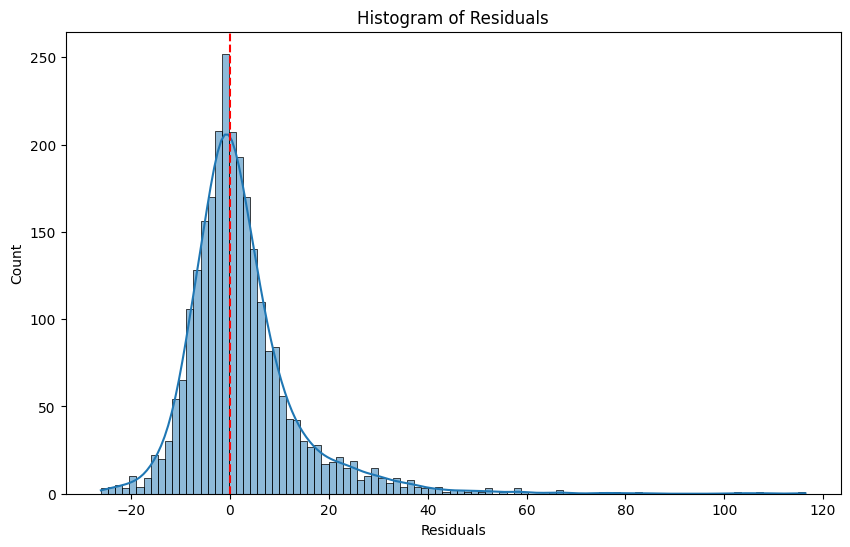

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals_df['diff_pct'], kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

In [64]:
# Calculate MAE, MSE, RMSE, and R²
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.29
MSE: 0.51
RMSE: 0.71
R²: 0.88


In [65]:
# Analyze extreme errors
extreme_errors_threshold = 10
extreme_results_df = residuals_df[np.abs(residuals_df['diff_pct']) > extreme_errors_threshold]  
extreme_results_df

,actual,predicted,diff,diff_pct
12641,0.49,0.63,0.09,18.52
6294,0.40,0.63,0.15,38.20
9941,0.48,0.91,0.25,52.91
10937,0.32,0.39,0.05,16.82
12282,0.87,0.68,-0.11,-12.32
6456,0.77,0.63,-0.08,-10.78
12899,1.34,1.04,-0.14,-10.33
13187,0.71,1.00,0.16,22.07
12653,1.40,1.90,0.19,13.39
6476,0.45,0.60,0.10,21.43


In [66]:
extreme_results_df.shape

(598, 4)

In [67]:
extreme_errors_pct = extreme_results_df.shape[0] * 100 / X_test.shape[0]
extreme_errors_pct

22.481203007518797

In [68]:
residuals_df[np.abs(residuals_df['diff_pct']) > 50]

,actual,predicted,diff,diff_pct
9941,0.48,0.91,0.25,52.91
1971,0.90,2.03,0.47,51.92
8742,0.60,1.36,0.39,64.75
4822,0.75,1.90,0.50,67.25
401,0.38,1.08,0.41,107.62
1379,0.72,1.64,0.43,59.66
7805,0.58,1.18,0.32,55.68
4424,0.35,0.65,0.20,58.04
8810,0.53,1.18,0.35,66.95
6741,0.83,2.41,0.62,75.01


In [69]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df

,property_type,bhk,area,locality,new_resale,age_of_property,bathrooms,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
12641,Flat,2,1080.00,other,Resale,Moderately New Property,2,Low Floor,1.00,Unfurnished,West,31,6,0,0,1
6294,Flat,2,1000.00,other,Resale,New Property,2,Mid Floor,1.00,Unfurnished,West,31,6,0,0,1
9941,Flat,3,1600.00,Adibatla,New,New Property,3,Low Floor,2.00,Unfurnished,West,32,8,0,0,0
10937,Flat,2,1100.00,Panchavati Colony,New,New Property,2,Low Floor,1.00,Semi-Furnished,NorthEast,9,0,0,0,0
12282,Flat,3,1485.00,Kukatpally,New,New Property,3,Mid Floor,1.00,Unfurnished,NorthEast,32,65,0,0,0
6456,Flat,2,1194.00,Bachupally,New,New Property,2,Low Floor,1.00,Unfurnished,East,4,0,0,0,0
12899,House,3,2100.00,Isnapur,New,New Property,3,Low Floor,1.00,Unfurnished,East,21,0,0,0,0
13187,Flat,3,1700.00,Gachibowli,New,New Property,3,Mid Floor,2.00,Semi-Furnished,East,93,15,0,0,0
12653,House,4,3203.00,Maheshwaram,New,New Property,4,Low Floor,1.00,Unfurnished,East,62,0,0,0,0
6476,Flat,2,1180.00,Manchirevula,New,New Property,2,Low Floor,1.00,Semi-Furnished,North,27,6,0,0,1


<h2 align="center" style="color:blue">Export the Model</h2>

In [70]:
import pickle

with open("app/artifacts/pipeline.pkl", "wb") as file:
    pickle.dump(best_pipeline, file)

with open("app/artifacts/df.pkl", "wb") as file:
    pickle.dump(X, file)

#### Trying out predictions

In [71]:
X.columns

Index(['property_type', 'bhk', 'area', 'locality', 'new_resale',
       'age_of_property', 'bathrooms', 'floor', 'balconies', 'furnishing_type',
       'facing', 'amenities_score', 'furnishing_score', 'study_room',
       'servant_room', 'pooja_room'],
      dtype='object')

In [98]:
X.iloc[2].values

array(['House', np.int64(10), np.float64(14400.0), 'Banjara Hills',
       'Resale', 'Moderately New Property', np.int64(11), 'Low Floor',
       np.float64(1.0), 'Semi-Furnished', 'North', np.int64(0),
       np.int64(0), np.int64(0), np.int64(0), np.int64(0)], dtype=object)

In [99]:
data = [['House', np.int64(10), np.float64(14400.0), 'Banjara Hills',
       'Resale', 'Moderately New Property', np.int64(11), 'Low Floor',
       np.float64(1.0), 'Semi-Furnished', 'North', np.int64(0),
       np.int64(0), np.int64(0), np.int64(0), np.int64(0)]]
columns = ['property_type', 'bhk', 'area', 'locality', 'new_resale',
       'age_of_property', 'bathrooms', 'floor', 'balconies', 'furnishing_type',
       'facing', 'amenities_score', 'furnishing_score', 'study_room',
       'servant_room', 'pooja_room']

one_df = pd.DataFrame(data, columns=columns)
one_df

,property_type,bhk,area,locality,new_resale,age_of_property,bathrooms,floor,balconies,furnishing_type,facing,amenities_score,furnishing_score,study_room,servant_room,pooja_room
0,House,10,14400.00,Banjara Hills,Resale,Moderately New Property,11,Low Floor,1.00,Semi-Furnished,North,0,0,0,0,0


In [100]:
np.expm1(best_pipeline.predict(one_df))

array([16.79146], dtype=float32)

In [101]:
y.iloc[2]

np.float64(17.47)